**Problema 1**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving MultivariableTRM.xlsx to MultivariableTRM.xlsx


In [2]:
import pandas as pd

# Leer el archivo subido
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Ver las primeras filas del dataset
data.head()

,Fecha,Ecopetrol,Bancolombia,Brent,TRM
0,2024-04-05,12.15,36.380001,92.81,3842.30
1,2024-04-08,12.04,36.230000,91.73,3863.05
2,2024-04-09,12.10,36.540001,92.13,3845.22
3,2024-04-10,11.84,35.810001,91.57,3812.13
4,2024-04-11,12.07,35.779999,91.49,3775.37


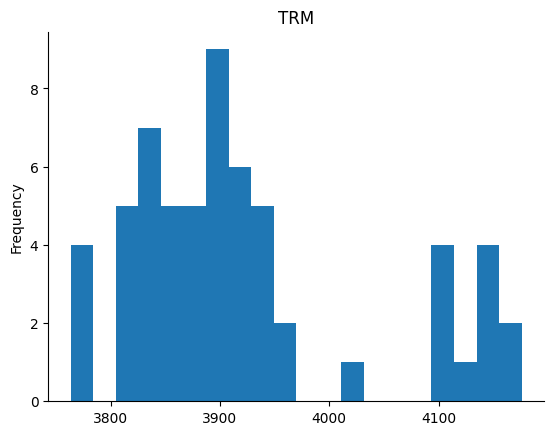

In [4]:
# @title TRM

from matplotlib import pyplot as plt
data['TRM'].plot(kind='hist', bins=20, title='TRM')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seleccionar características y variable objetivo
X = data[['Ecopetrol', 'Bancolombia', 'Brent']]
y = data['TRM']

# Normalizar los datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))  # Capa de entrada y primera capa oculta
model.add(Dense(64, activation='relu'))  # Segunda capa oculta
model.add(Dense(1))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 66ms/step - loss: 0.2458 - val_loss: 0.2418
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1539 - val_loss: 0.1629
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0973 - val_loss: 0.1196
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0786 - val_loss: 0.0993
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0789 - val_loss: 0.0914
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0806 - val_loss: 0.0884
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0786 - val_loss: 0.0862
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0735 - val_loss: 0.0856
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0686 - val_loss: 0.0869
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0662 - val_loss: 0.0897
Epoch 11/100
4/4 [=

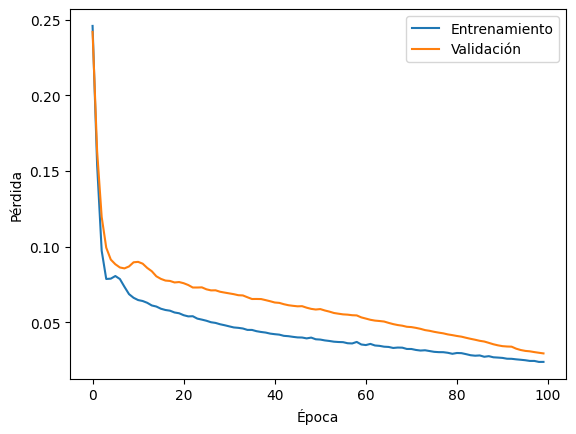

In [7]:
import matplotlib.pyplot as plt

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

**Problema 2**

In [1]:
from google.colab import files

# Subir el archivo kaggle.json
files.upload()

# Crear el directorio .kaggle y mover el archivo kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar y descomprimir el conjunto de datos
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/f

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Ruta al directorio de entrenamiento de tu conjunto de datos
train_data_dir = 'fruits-360_dataset/fruits-360/Training'

# Obtener las clases de la carpeta de entrenamiento
classes = [folder for folder in sorted(os.listdir(train_data_dir))]

# Preparar generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Divide los datos en entrenamiento (80%) y validación (20%)
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='training'  # Usa solo el conjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    classes=classes,
    subset='validation'  # Usa solo el conjunto de validación
)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.


In [3]:
# Definir el modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')  # Número de clases automáticamente determinado
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1694/1694 [==============================] - 1066s 629ms/step - loss: 0.6390 - accuracy: 0.8264 - val_loss: 0.4117 - val_accuracy: 0.9056
Epoch 2/10
1694/1694 [==============================] - 1069s 631ms/step - loss: 0.0924 - accuracy: 0.9710 - val_loss: 0.3077 - val_accuracy: 0.9270
Epoch 3/10
1694/1694 [==============================] - 1001s 591ms/step - loss: 0.0712 - accuracy: 0.9793 - val_loss: 0.2747 - val_accuracy: 0.9440
Epoch 4/10
1694/1694 [==============================] - 981s 579ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.5829 - val_accuracy: 0.8923
Epoch 5/10
1694/1694 [==============================] - 990s 585ms/step - loss: 0.0456 - accuracy: 0.9866 - val_loss: 0.5238 - val_accuracy: 0.9013
Epoch 6/10
1694/1694 [==============================] - 990s 584ms/step - loss: 0.0467 - accuracy: 0.9867 - val_loss: 0.3303 - val_accuracy: 0.9340
Epoch 7/10
1694/1694 [==============================] - 1024s 605ms/step - loss: 0.0417 - accuracy: 0.9882 - 

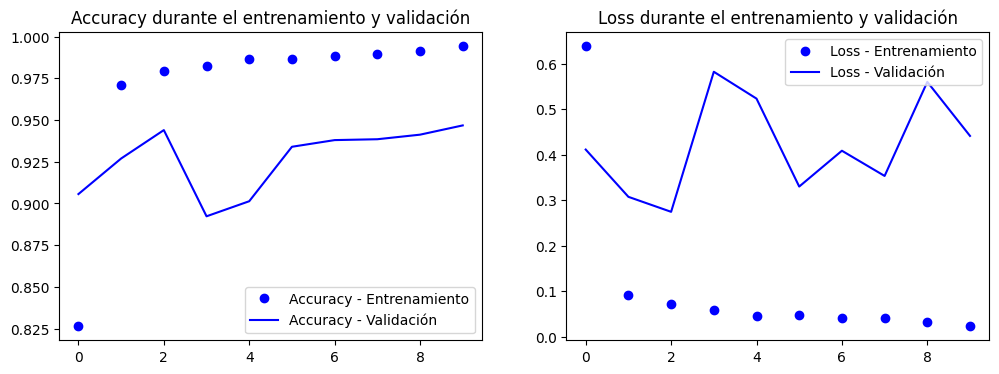

In [4]:
import matplotlib.pyplot as plt

# Función para graficar el historial de entrenamiento
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Accuracy - Entrenamiento')
    plt.plot(epochs, val_acc, 'b', label='Accuracy - Validación')
    plt.title('Accuracy durante el entrenamiento y validación')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Loss - Entrenamiento')
    plt.plot(epochs, val_loss, 'b', label='Loss - Validación')
    plt.title('Loss durante el entrenamiento y validación')
    plt.legend()

    plt.show()

# Graficar el historial de entrenamiento
plot_training_history(history)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image

def classify_fruit(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]

    return predicted_class

In [6]:
# Subir una imagen para clasificar
uploaded = files.upload()

for img_name in uploaded.keys():
    print(f'Clasificación para {img_name}: {classify_fruit(img_name)}')

Saving WhatsApp Image 2024-07-12 at 9.20.20 AM.jpeg to WhatsApp Image 2024-07-12 at 9.20.20 AM.jpeg
1/1 [==============================] - 0s 202ms/step
Clasificación para WhatsApp Image 2024-07-12 at 9.20.20 AM.jpeg: Maracuja


**Problema 3**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cancer1.xml to cancer1.xml


In [2]:
import xml.etree.ElementTree as ET
import csv

# Cargar y parsear el archivo XML
tree = ET.parse('cancer1.xml')
root = tree.getroot()

# Encuentra la sección de datos
data_section = root.find('./algorithm/training/data')

# Crear una lista para almacenar las filas
rows = []

# Extraer los encabezados, si están disponibles
headers = [elem.tag for elem in data_section[0]]

# Extraer cada fila de datos
for row in data_section.findall('row'):
    # Separar los valores por espacios
    values = row.text.split()
    rows.append(values)

# Escribir las filas en un archivo CSV
with open('archivo.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Escribir los encabezados
    csv_writer.writerow(headers)
    # Escribir las filas de datos
    for row in rows:
        csv_writer.writerow(row)

print("El archivo CSV ha sido creado exitosamente.")

El archivo CSV ha sido creado exitosamente.


In [3]:
import csv

with open('archivo.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        print(row)

[]
['0.2', '0.1', '0.1', '0.1', '0.2', '0.1', '0.2', '0.1', '0.1', '1']
['0.2', '0.1', '0.1', '0.1', '0.2', '0.1', '0.3', '0.1', '0.1', '1']
['0.5', '0.1', '0.1', '0.1', '0.2', '0.1', '0.2', '0.1', '0.1', '1']
['0.5', '0.4', '0.6', '0.8', '0.4', '0.1', '0.8', '1', '0.1', '0']
['0.5', '0.3', '0.3', '0.1', '0.2', '0.1', '0.2', '0.1', '0.1', '1']
['0.2', '0.3', '0.1', '0.1', '0.3', '0.1', '0.1', '0.1', '0.1', '1']
['0.3', '0.5', '0.7', '0.8', '0.8', '0.9', '0.7', '1', '0.7', '0']
['1', '0.5', '0.6', '1', '0.6', '1', '0.7', '0.7', '1', '0']
['1', '0.9', '0.8', '0.7', '0.6', '0.4', '0.7', '1', '0.3', '0']
['0.4', '0.1', '0.1', '0.1', '0.2', '0.1', '0.3', '0.1', '0.1', '1']
['0.5', '0.1', '0.1', '0.1', '0.2', '0.1', '0.3', '0.1', '0.1', '1']
['0.8', '1', '1', '0.1', '0.3', '0.6', '0.3', '0.9', '0.1', '0']
['0.1', '0.1', '0.3', '0.1', '0.2', '0.1', '0.2', '0.1', '0.1', '1']
['0.1', '0.1', '0.1', '0.2', '0.1', '0.1', '0.1', '0.1', '0.1', '1']
['0.3', '0.4', '0.5', '0.2', '0.6', '0.8', '0.4', '

In [4]:
import pandas as pd

# Definir los encabezados
column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'target']

# Cargar datos desde el archivo CSV
file_path = 'archivo.csv'
data = pd.read_csv(file_path, names=column_names)

# Verificar los datos
print(data.head())

    x0   x1   x2   x3   x4   x5   x6   x7   x8  target
0  0.2  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1       1
1  0.2  0.1  0.1  0.1  0.2  0.1  0.3  0.1  0.1       1
2  0.5  0.1  0.1  0.1  0.2  0.1  0.2  0.1  0.1       1
3  0.5  0.4  0.6  0.8  0.4  0.1  0.8  1.0  0.1       0
4  0.5  0.3  0.3  0.1  0.2  0.1  0.2  0.1  0.1       1


In [5]:
# Separar características (X) y etiquetas (y)
X = data.drop(columns=['target'])
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

In [8]:
# Compilar modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Para clasificación binaria
              metrics=['accuracy'])

In [9]:
# Entrenar modelo
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 3s 99ms/step - loss: 0.6760 - accuracy: 0.7679 - val_loss: 0.6666 - val_accuracy: 0.7679
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6432 - accuracy: 0.7857 - val_loss: 0.6486 - val_accuracy: 0.7500
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6112 - accuracy: 0.7946 - val_loss: 0.6214 - val_accuracy: 0.8036
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5777 - accuracy: 0.8616 - val_loss: 0.5892 - val_accuracy: 0.9107
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.5386 - accuracy: 0.8884 - val_loss: 0.5488 - val_accuracy: 0.9286
Epoch 6/50
7/7 [==============================] - 0s 23ms/step - loss: 0.4937 - accuracy: 0.9509 - val_loss: 0.4994 - val_accuracy: 0.9464
Epoch 7/50
7/7 [==============================] - 0s 24ms/step - loss: 0.4469 - accuracy: 0.9375 - val_loss: 0.4503 - val_accuracy: 0.9464
Epoch 8/50
7/7 [===========

In [10]:
# Evaluar modelo en conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Exactitud en el conjunto de prueba: {accuracy}')

3/3 [==============================] - 0s 6ms/step - loss: 0.1058 - accuracy: 0.9857
Pérdida en el conjunto de prueba: 0.10581028461456299
Exactitud en el conjunto de prueba: 0.9857142567634583


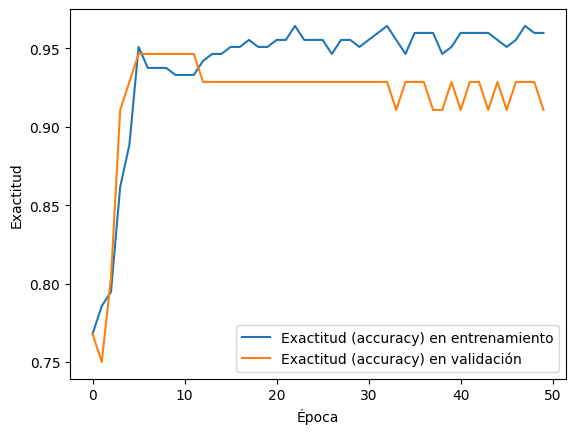

In [11]:
import matplotlib.pyplot as plt

# Graficar la exactitud (accuracy) de entrenamiento y validación a lo largo de las épocas
plt.plot(history.history['accuracy'], label='Exactitud (accuracy) en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud (accuracy) en validación')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()